# Úkol č. 1 - redukce dimenzionality a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML2/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.
<br/><br/>

  * Použijte natrénovaný generativní model Naivního Bayesova klasifikátoru nebo Lineární diskriminační analýzy (podle Vaší volby) a vygenerujte pro každou třídu 5 datových bodů, které následně přetransformujte do rozměrů 28x28 a zobrazte pomocí `imshow`. Diskutujte kvalitu vygenerovaných dat. K vygenerování můžete využít funkci [multivariate_normal](https://numpy.org/doc/2.2/reference/random/generated/numpy.random.multivariate_normal.html) z `numpy`.

  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky aplikace modelů (žádné další generování už nedělejte) a pokuste se je vylepšit.
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
<br/><br/>
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
       * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami):
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Homework 01

## Loading Libraries & Reading Data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RND_SEED = 4547

We will split dataset into train, validation and test datasets with 60%/20%/20% proportions.

In [9]:
from sklearn.model_selection import train_test_split

target_col = 'label'
data = pd.read_csv('train.csv')

X = data.drop(columns=[target_col])
y = data[target_col]

Xtrain, Xval, ytrain, yval = train_test_split(
    X, y, test_size=0.4, random_state=RND_SEED, shuffle=True
)

Xval, Xtest, yval, ytest = train_test_split(
    Xval, yval, test_size=0.5, random_state=RND_SEED, shuffle=True
)
Xtrain.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1084,0,0,0,0,0,0,0,62,68,41,...,82,29,0,0,0,0,0,0,0,0
1328,0,0,0,0,0,0,0,0,0,0,...,168,156,73,0,0,0,0,0,0,0
468,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
718,0,0,0,0,0,0,0,0,0,0,...,180,87,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Analysis

We will display images that are provided by our dataset. Each row is actually a $28 \times 28$ grayscale image, so firstly we will reconstruct those.

In [10]:
def display_img(ax, x, y, kw_imshow = dict(cmap='binary', vmin=0, vmax=255), prefix_label='Label: '):
    x_ = x.reshape(28, 28)
    ret = ax.imshow(
        x_, 
        **kw_imshow
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"{prefix_label}{y}")
    return ret

def display_gallery(X, Y):
    n = int(np.sqrt(X.shape[0]))
    m = int(np.ceil(X.shape[0] / n))
    fig, axes = plt.subplots(n, m, figsize=(m*3, n*3.))

    for ax, x, y in zip(axes.flatten(), X.iterrows(), Y):
        display_img(ax, x[1].values, y)
    for ax in axes.flatten()[X.shape[0]:]:
        ax.remove()

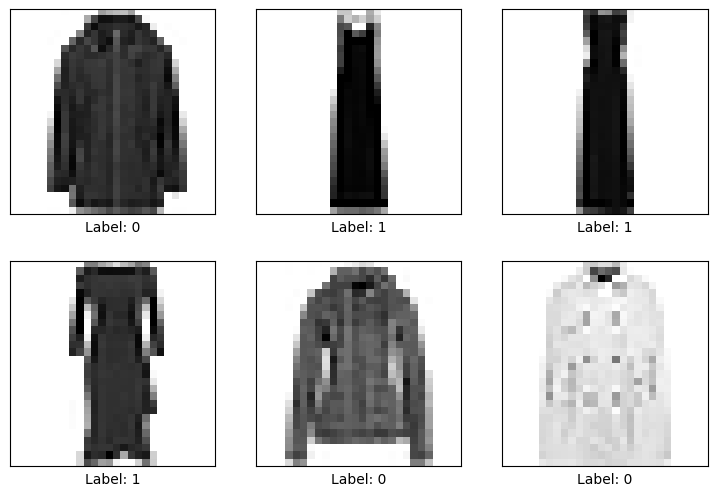

In [11]:
display_gallery(Xtrain.tail(6), ytrain.tail(6))

We can see that all gowns are labeled 1 and all longsleeves are labeled 0. Let's look at class imbalance.

In [12]:
print(f'Positive rate: {ytrain.mean():.1%}')

Positive rate: 49.3%


We can say that dataset is perferctly balanced as $0.7%$ deviation is neglectable.

In purely tabular dataset we would inspect statistical measures of different features. Here it would be meaningless to talk about **pixel122** kurtosis. Nevertheless, it would be interesting to see averages  and variances of individual pixels. First one will give us a taste of what are we working with and later one will most probably show regions that will be important for classification.

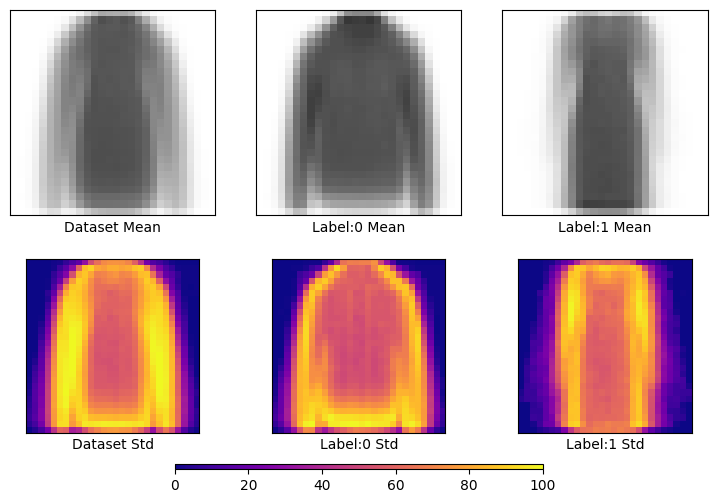

In [13]:
from matplotlib.cm import ScalarMappable
fig, [[axm, axm0, axm1], [axs, axs0, axs1]] = plt.subplots(2, 3, figsize=(9, 6))


display_img(axm,  Xtrain.mean().values,              'Dataset Mean', prefix_label='')
display_img(axm0, Xtrain[ytrain == 0].mean().values, 'Label:0 Mean', prefix_label='')
display_img(axm1, Xtrain[ytrain == 1].mean().values, 'Label:1 Mean', prefix_label='')

display_img(axs,  Xtrain.std().values,              'Dataset Std', kw_imshow={'cmap':'plasma', 'vmin':0, 'vmax':100}, prefix_label='')
display_img(axs0, Xtrain[ytrain == 0].std().values, 'Label:0 Std', kw_imshow={'cmap':'plasma', 'vmin':0, 'vmax':100}, prefix_label='')
display_img(axs1, Xtrain[ytrain == 1].std().values, 'Label:1 Std', kw_imshow={'cmap':'plasma', 'vmin':0, 'vmax':100}, prefix_label='')

sm = ScalarMappable(cmap='plasma')
sm.set_clim(0, 100)
_=fig.colorbar(
    sm,
    ax=[axs, axs0, axs1],
    location='bottom',
    aspect=70,
    fraction=0.025
)

We can see that the biggest differentiation will be amid edges and center horizontally. Another thing to note is that borders have extremly low deviation, which alignes with our perception of a photo being centered.

## Applying Models

In [14]:
from sklearn.metrics import accuracy_score

scores = []

def evaluate_model(model, Xtrain=Xtrain, Xval=Xval, ytrain=ytrain, yval=yval):
    model.fit(Xtrain, ytrain)
    train_acc = accuracy_score(ytrain, model.predict(Xtrain))
    val_acc   = accuracy_score(yval,   model.predict(Xval))
    return val_acc, train_acc

### Support Vector Machines

SVM can be good because it is a very flexible model that can express otherwise-hard-to-model interactions between features. We will try out **Gaussian** and **Polyominal** square and qubic kernels.

Hyperparameter **C** is equivalent to inverse of regularisation parameter of linear models, so it can be searched as a maximization of validation accuracy.

In [15]:
from sklearn.svm import SVC
from scipy.optimize import minimize_scalar

def svm_hp_search(kernel, degree=1):
    def func(C):
        global Xtrain, Xval, ytrain, yval
        model = SVC(kernel=kernel, degree=degree, C=C).fit(Xtrain, ytrain)
        return -accuracy_score(yval, model.predict(Xval))
    res = minimize_scalar(func, bounds=(0, 10e6), method='bounded')
    print(f"Kernel:       {kernel}")
    print(f"Degree:       {degree}")
    print(f"Val accuracy: {-res.fun:.3%}")
    print(f"C:            {res.x:.3f}")
    return evaluate_model(SVC(kernel=kernel, degree=degree, C=res.x))

In [16]:
val_acc, train_acc = svm_hp_search('poly', 2)
scores.append(
    (val_acc, train_acc, 'SVM', dict(kernel='poly', degree=2))
)
print('')
val_acc, train_acc = svm_hp_search('poly', 3)
scores.append(
    (val_acc, train_acc, 'SVM', dict(kernel='poly', degree=3))
)
print('')
val_acc, train_acc = svm_hp_search('rbf')
scores.append(
    (val_acc, train_acc, 'SVM', dict(kernel='rbf'))
)
print('')

Kernel:       poly
Degree:       2
Val accuracy: 96.333%
C:            9999999.849

Kernel:       poly
Degree:       3
Val accuracy: 95.000%
C:            9999999.849

Kernel:       rbf
Degree:       1
Val accuracy: 95.000%
C:            9999999.849



All **C** values are close to upper bound of searched spaced, note that raising it will not change result, because **C** is inverse we found parameters that yield the least regularized models and increasing **C** further will change *Xi* term's impact only slightly.

### Naive Bayes (Gaussian)

Naive Bayes could be a good fit for this task due to its invariance to number of dimensions. On other hand Naive Bayes assumes that features are independent, which is not true in our case (think pixel sleeves).

We will model pixel variables with a Gaussian distribution for Naive Bayes. It is not the best distribution for our case, we might have pixels darker than $0$ and brither than $255$, but All models are wrong.

In [17]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
val_acc, train_acc = evaluate_model(GNB)
scores.append(
    (val_acc, train_acc, 'GaussianNB', {})
)
print(f"Training   accuracy: {train_acc:.3%}")
print(f"Validation accuracy: {val_acc:.3%}")

Training   accuracy: 86.556%
Validation accuracy: 82.000%


In spite of wrong assumptions and poor choice of distribution, results are not too bad.

### Naive Bayes (Bernoulli)

Until now we have viewed pixels as discrete values between $0$ and $255$, but they can be viewed as a being either white or dark. This leads to Bernoulli distibution for each pixel. We need to decide where we want to put separate light pixels from black ones. One obvious choice will be $147.5 = 255 / 2$. We will also test other approach where we learn those borders from data.

In [18]:
from sklearn.naive_bayes import BernoulliNB

val_acc, train_acc = evaluate_model(BernoulliNB(binarize=147.5))
scores.append(
    (val_acc, train_acc, 'BernoulliNB', dict(binarize=147.5))
)
print( "Discretize at 147.5")
print(f"Training   accuracy: {train_acc:.3%}")
print(f"Validation accuracy: {val_acc:.3%}")

Discretize at 147.5
Training   accuracy: 85.222%
Validation accuracy: 81.667%


In [19]:
from sklearn.pipeline import make_pipeline as pipeline
from sklearn.preprocessing import KBinsDiscretizer
import warnings

with warnings.catch_warnings(action="ignore"): # Screams 100 times
    val_acc, train_acc = evaluate_model(
        pipeline(KBinsDiscretizer(n_bins=2, encode='ordinal', random_state=RND_SEED), BernoulliNB())
    )
scores.append(
    (val_acc, train_acc, 'BernoulliNB + KBinsDiscretizer', dict(n_bins=2, encode='ordinal', random_state=RND_SEED))
)
print( "Data driven discretization")
print(f"Training   accuracy: {train_acc:.3%}")
print(f"Validation accuracy: {val_acc:.3%}")

Data driven discretization
Training   accuracy: 87.111%
Validation accuracy: 83.333%


Discretizeing at 147.5 yields worse results than Gaussian Naive Bayes, but adjusting bins for each individual pixel produces better results. Though, it is still far behind SVM.

### LDA

LDA assumes data is Gaussian distributed for each class, that does not hold for our case as values are bounded by $0$ and $255$.

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

val_acc, train_acc = evaluate_model(LDA())
scores.append(
    (val_acc, train_acc, 'LDA', {})
)
print(f"Training   accuracy: {train_acc:.3%}")
print(f"Validation accuracy: {val_acc:.3%}")

Training   accuracy: 100.000%
Validation accuracy: 81.000%


### Generation

Both Naive Gaussian and Linear Discriminant Analysis are generative models, so we could generate images based on desired label. Let us generate images by Gaussian Naive Bayes.

Means:
[[0.         0.         0.00877193]
 [0.         0.         0.        ]]
Variances:
[[1.05448344e-05 1.05448344e-05 2.18634226e-02]
 [1.05448344e-05 1.05448344e-05 1.05448344e-05]]


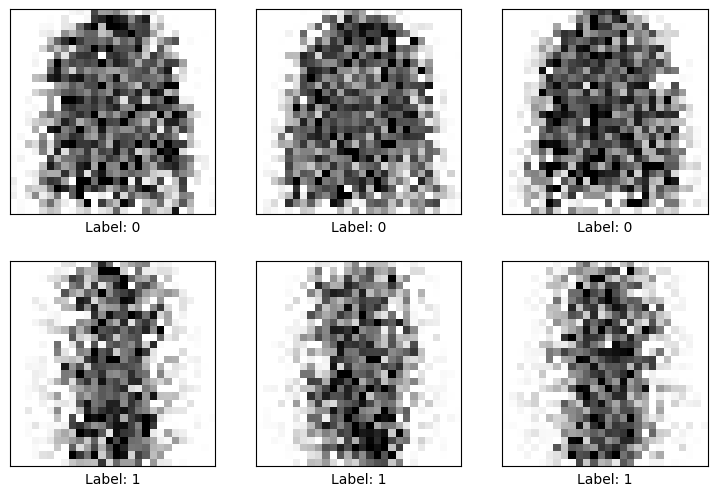

In [21]:
print(f"Means:\n{GNB.theta_[:, :3]}")
print(f"Variances:\n{GNB.var_[:, :3]}")
df = pd.DataFrame(np.concat([
    np.random.multivariate_normal(GNB.theta_[0], np.diag(GNB.var_[0]), size=3),
    np.random.multivariate_normal(GNB.theta_[1], np.diag(GNB.var_[1]), size=3)
], axis=0))

display_gallery(df, [0,0,0,1,1,1])

Images are noisy, but contours are definetly distinguishable.

## Dimensionsionality Reduction

Let's run dimensionality reduction and train new models. All of our algorithms are robust against curse of dimensionality, so we can expect something like bias-variance trade-off. We can expect regularization from PCA because it will drop features that provide noise into data.

### PCA

We will use scikit-learn implementation of PCA. We will compute matrix for maximal number of components and iterate over all $20k + 1$ principal components to find the best parameter.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=Xtrain.shape[1]).fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)
Xval_pca   = pca.transform(Xval)

def find_best_n_components(model):
    global Xtrain_pca, Xval_pca, ytrain, yval
    n_comps    = []
    val_accs   = []
    train_accs = []

    for n_comp in range(1, 784, 20):
        model.fit(Xtrain_pca[:, :n_comp], ytrain)
        n_comps.append(n_comp)
        train_accs.append(accuracy_score(ytrain, model.predict(Xtrain_pca[:, :n_comp])))
        val_accs.append(accuracy_score(yval, model.predict(Xval_pca[:, :n_comp])))
    return n_comps, val_accs, train_accs

#### SVM

In [23]:
from itertools import product

def find_best_n_components_svm(kernel, degree=1):
    global Xtrain_pca, Xval_pca, ytrain, yval
    n_comp_arg = None
    C_arg      = None
    val_acc    = -1
    train_acc  = None
    
    
    for n_comp, C in product(range(1, 784, 20), np.logspace(-2, 6, 9, endpoint=True)):
        model = SVC(kernel=kernel, degree=degree, C=C)
        model.fit(Xtrain_pca[:, :n_comp], ytrain)
        new_val_acc = accuracy_score(yval, model.predict(Xval_pca[:, :n_comp]))
        if new_val_acc > val_acc:
            val_acc = new_val_acc
            train_acc = accuracy_score(ytrain, model.predict(Xtrain_pca[:, :n_comp]))
            n_comp_arg = n_comp
            C_arg = C
    return n_comp_arg, C_arg, val_acc, train_acc

In [24]:
%%time
n_comp, C, val_acc, train_acc = find_best_n_components_svm('poly', 2)
scores.append(
    (val_acc, train_acc, 'SVM + PCA', dict(kernel='poly', degree=2, C=C, n_comp=n_comp))
)
print(f"Number of Principal Components: {n_comp}")
print(f"Regularization parameter (C):   {C:.3f}")
print(f"Validation Accuracy:            {val_acc:.3f}")
print(f"Training Accuracy:              {train_acc:.3f}")

Number of Principal Components: 81
Regularization parameter (C):   10.000
Validation Accuracy:            0.953
Training Accuracy:              0.994
CPU times: user 1min 18s, sys: 10.2 ms, total: 1min 18s
Wall time: 1min 17s


In [25]:
%%time
n_comp, C, val_acc, train_acc = find_best_n_components_svm('poly', 3)
scores.append(
    (val_acc, train_acc, 'SVM + PCA', dict(kernel='poly', degree=3, C=C, n_comp=n_comp))
)
print(f"Number of Principal Components: {n_comp}")
print(f"Regularization parameter (C):   {C:.3f}")
print(f"Validation Accuracy:            {val_acc:.3f}")
print(f"Training Accuracy:              {train_acc:.3f}")

Number of Principal Components: 21
Regularization parameter (C):   10.000
Validation Accuracy:            0.963
Training Accuracy:              0.986
CPU times: user 1min 49s, sys: 1.08 ms, total: 1min 49s
Wall time: 1min 49s


In [26]:
%%time
n_comp, C, val_acc, train_acc = find_best_n_components_svm('rbf')
scores.append(
    (val_acc, train_acc, 'SVM + PCA', dict(kernel='rbf', C=C, n_comp=n_comp))
)
print(f"Number of Principal Components: {n_comp}")
print(f"Regularization parameter (C):   {C:.3f}")
print(f"Validation Accuracy:            {val_acc:.3f}")
print(f"Training Accuracy:              {train_acc:.3f}")

Number of Principal Components: 21
Regularization parameter (C):   100.000
Validation Accuracy:            0.953
Training Accuracy:              0.999
CPU times: user 55.1 s, sys: 992 μs, total: 55.1 s
Wall time: 55.1 s


#### Naive Bayes

CPU times: user 586 ms, sys: 5 μs, total: 586 ms
Wall time: 585 ms


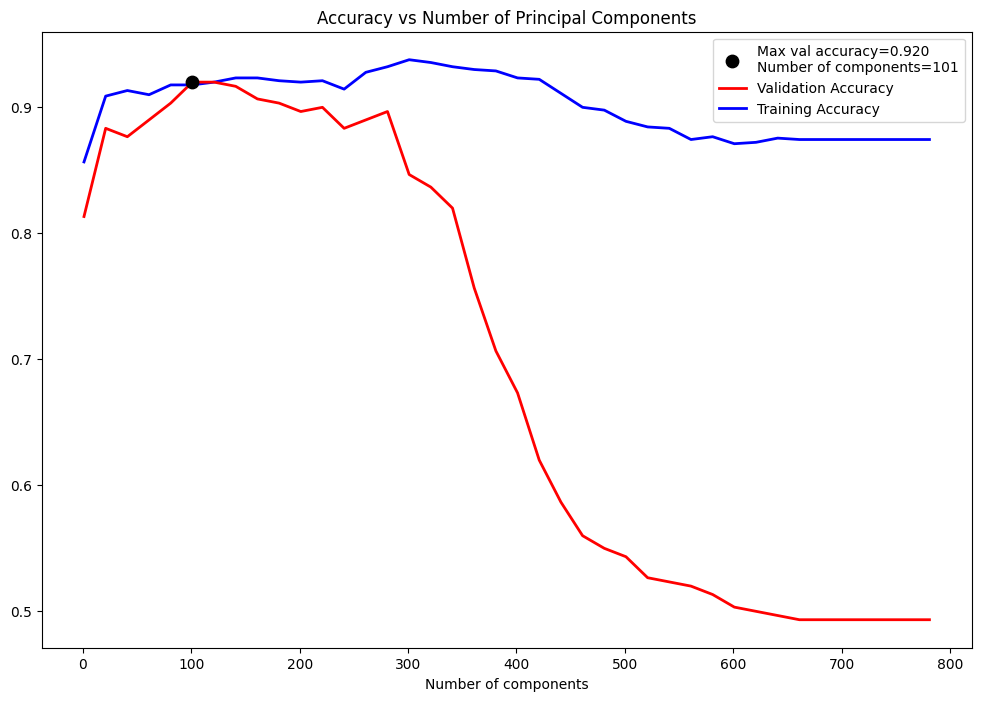

In [27]:
%%time
n_comps, val_accs, train_accs = find_best_n_components(GaussianNB())
fig, ax = plt.subplots(figsize=(12, 8))


idx = np.argmax(val_accs)
scores.append(
    (val_accs[idx], train_accs[idx], 'GaussianNB + PCA', dict(n_comp=n_comps[idx]))
)

ax.set_xlabel('Number of components')
ax.scatter(n_comps[idx], val_accs[idx], marker='o', c='black', s=80, zorder=4, label=f"Max val accuracy={val_accs[idx]:.3f}\nNumber of components={n_comps[idx]}")
ax.plot(n_comps, val_accs,   c='r', label='Validation Accuracy', linewidth=2, zorder=3)
ax.plot(n_comps, train_accs, c='b', label='Training Accuracy', linewidth=2, zorder=1)
ax.legend()
_ = ax.set_title('Accuracy vs Number of Principal Components')

#### LDA

CPU times: user 42.9 s, sys: 172 ms, total: 43.1 s
Wall time: 5.5 s


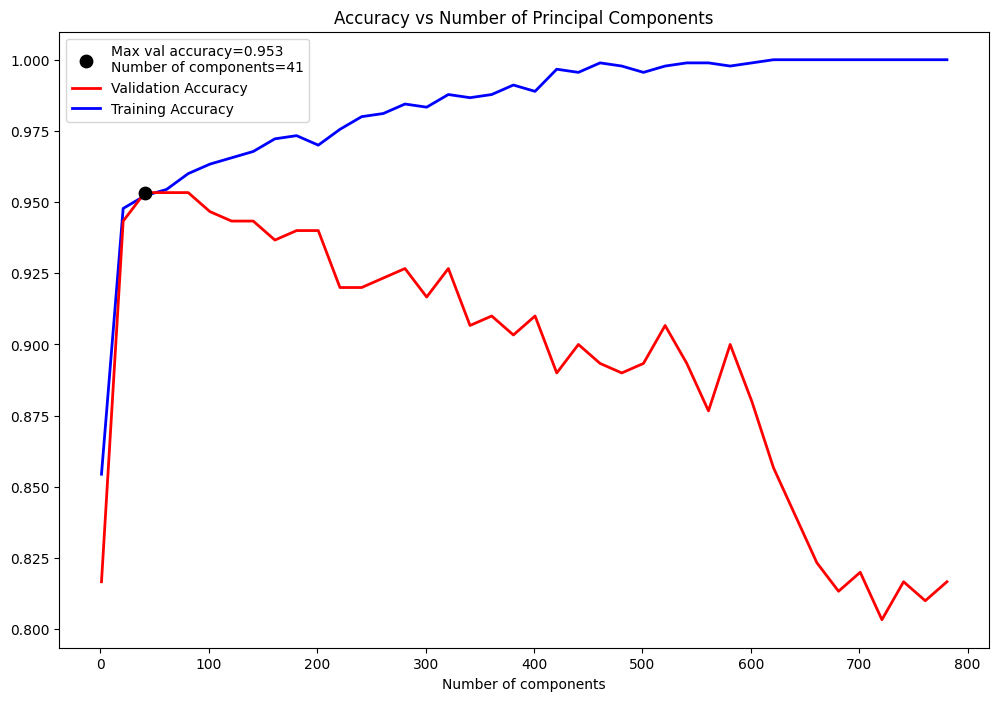

In [28]:
%%time
n_comps, val_accs, train_accs = find_best_n_components(LDA())
fig, ax = plt.subplots(figsize=(12, 8))


idx = np.argmax(val_accs)
scores.append(
    (val_accs[idx], train_accs[idx], 'LDA + PCA', dict(n_comp=n_comps[idx]))
)

ax.set_xlabel('Number of components')
ax.scatter(n_comps[idx], val_accs[idx], marker='o', c='black', s=80, zorder=4, label=f"Max val accuracy={val_accs[idx]:.3f}\nNumber of components={n_comps[idx]}")
ax.plot(n_comps, val_accs,   c='r', label='Validation Accuracy', linewidth=2, zorder=3)
ax.plot(n_comps, train_accs, c='b', label='Training Accuracy', linewidth=2, zorder=1)
ax.legend()
_ = ax.set_title('Accuracy vs Number of Principal Components')

### LLE

Locally Linear Embeding embedes manifold into lower dimensional space.

In [29]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

lle = LLE().fit(Xtrain)
Xtrain_lle = lle.transform(Xtrain)
Xtrain_lle

array([[ 0.01230854,  0.03512309],
       [ 0.00629509,  0.12576383],
       [-0.0427152 , -0.02319784],
       ...,
       [-0.03159974, -0.0054198 ],
       [ 0.0398911 , -0.01036926],
       [ 0.00619352,  0.12539782]], shape=(900, 2))

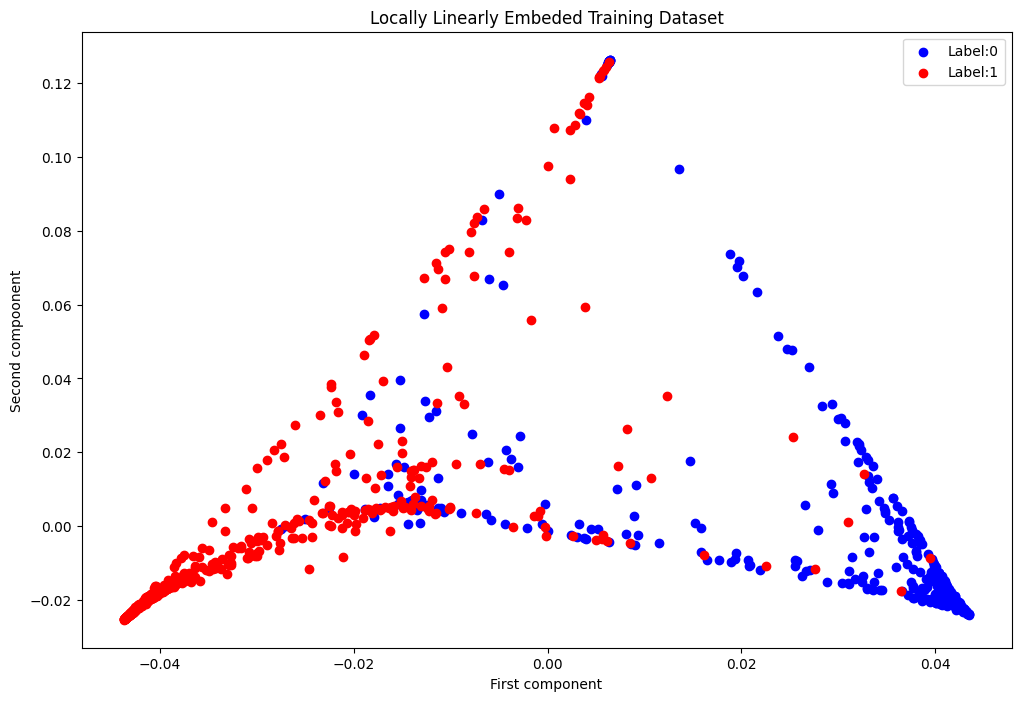

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(Xtrain_lle[ytrain == 0, 0], Xtrain_lle[ytrain == 0, 1], c='b', label='Label:0')
ax.scatter(Xtrain_lle[ytrain == 1, 0], Xtrain_lle[ytrain == 1, 1], c='r', label='Label:1')
ax.legend()
ax.set_xlabel('First component')
ax.set_ylabel('Second compoonent')
_ = ax.set_title('Locally Linearly Embeded Training Dataset')

We can see that class regions intersact a lot, so it will be hard for any model to distinguish between classes. Increasing number of components might payoff, so we will check more options.

In [ ]:
%%time
lle_n_comps = [2, 5, 10]

lles        = [LLE(n_neighbors=k).fit(Xtrain) for k in lle_n_comps] 
Xtrains_lle = [lle.transform(Xtrain) for lle in lles]
Xvals_lle   = [lle.transform(Xval) for lle in lles]

In [ ]:
def find_best_lle_n_comps(model):
    global Xtrains_lle, Xvals_lle, ytrain, yval, lle_n_comps
    n_comps    = []
    val_accs   = []
    train_accs = []
    
    for xtrain, xval, n_comp in zip(Xtrains_lle, Xvals_lle, lle_n_comps):
        model.fit(xtrain, ytrain)
        n_comps.append(n_comp)
        val_accs.append(accuracy_score(yval, model.predict(xval)))
        train_accs.append(accuracy_score(ytrain, model.predict(xtrain)))
    return n_comps, val_accs, train_accs

#### SVM

In [ ]:
def find_best_lle_n_comps_svm(kernel, degree=1):
    global Xtrains_lle, Xvals_lle, ytrain, yval
    n_comp_arg = None
    C_arg      = None
    val_acc    = -1
    train_acc  = None
    
    
    for (xtrain, xval, n_comp), C in product(zip(Xtrains_lle, Xvals_lle, lle_n_comps), np.logspace(-2, 6, 3, endpoint=True)):
        model = SVC(kernel=kernel, degree=degree, C=C)
        model.fit(xtrain, ytrain)
        new_val_acc = accuracy_score(yval, model.predict(xval))
        if new_val_acc > val_acc:
            val_acc = new_val_acc
            train_acc = accuracy_score(ytrain, model.predict(xtrain))
            n_comp_arg = n_comp
            C_arg = C
    return n_comp_arg, C_arg, val_acc, train_acc

In [ ]:
%%time
n_comp, C, val_acc, train_acc = find_best_lle_n_comps_svm('poly', 2)
scores.append(
    (val_acc, train_acc, 'SVM + LLE', dict(kernel='poly', degree=2, C=C, n_comp=n_comp))
)
print(f"Number of Principal Components: {n_comp}")
print(f"Regularization parameter (C):   {C:.3f}")
print(f"Validation Accuracy:            {val_acc:.3f}")
print(f"Training Accuracy:              {train_acc:.3f}")

In [ ]:
%%time
n_comp, C, val_acc, train_acc = find_best_lle_n_comps_svm('poly', 3)
scores.append(
    (val_acc, train_acc, 'SVM + LLE', dict(kernel='poly', degree=3, C=C, n_comp=n_comp))
)
print(f"Number of Principal Components: {n_comp}")
print(f"Regularization parameter (C):   {C:.3f}")
print(f"Validation Accuracy:            {val_acc:.3f}")
print(f"Training Accuracy:              {train_acc:.3f}")

In [ ]:
%%time
n_comp, C, val_acc, train_acc = find_best_lle_n_comps_svm('rbf')
scores.append(
    (val_acc, train_acc, 'SVM + LLE', dict(kernel='rbf', C=C, n_comp=n_comp))
)
print(f"Number of Principal Components: {n_comp}")
print(f"Regularization parameter (C):   {C:.3f}")
print(f"Validation Accuracy:            {val_acc:.3f}")
print(f"Training Accuracy:              {train_acc:.3f}")

#### Naive Bayes

In [5]:
%%time
n_comps, val_accs, train_accs = find_best_lle_n_comps(GaussianNB())
fig, ax = plt.subplots(figsize=(12, 8))


idx = np.argmax(val_accs)
scores.append(
    (val_accs[idx], train_accs[idx], 'GaussianNB + LLE', dict(n_comp=n_comps[idx]))
)

ax.set_xlabel('Number of components')
ax.scatter(n_comps[idx], val_accs[idx], marker='o', c='black', s=80, zorder=4, label=f"Max val accuracy={val_accs[idx]:.3f}\nNumber of components={n_comps[idx]}")
ax.plot(n_comps, val_accs,   c='r', label='Validation Accuracy', linewidth=2, zorder=3)
ax.plot(n_comps, train_accs, c='b', label='Training Accuracy', linewidth=2, zorder=1)
ax.legend()
_ = ax.set_title('Accuracy vs Number of LLE Components')

NameError: name 'GaussianNB' is not defined

#### LDA

In [6]:
%%time
n_comps, val_accs, train_accs = find_best_lle_n_comps(LDA())
fig, ax = plt.subplots(figsize=(12, 8))


idx = np.argmax(val_accs)
scores.append(
    (val_accs[idx], train_accs[idx], 'LDA + LLE', dict(n_comp=n_comps[idx]))
)

ax.set_xlabel('Number of components')
ax.scatter(n_comps[idx], val_accs[idx], marker='o', c='black', s=80, zorder=4, label=f"Max val accuracy={val_accs[idx]:.3f}\nNumber of components={n_comps[idx]}")
ax.plot(n_comps, val_accs,   c='r', label='Validation Accuracy', linewidth=2, zorder=3)
ax.plot(n_comps, train_accs, c='b', label='Training Accuracy', linewidth=2, zorder=1)
ax.legend()
_ = ax.set_title('Accuracy vs Number of LLE Components')

NameError: name 'LDA' is not defined

## Testing & Evaluation

In [7]:
...

Ellipsis

## Conclusion